# 이미지 세그멘테이션(Image Segmentation)



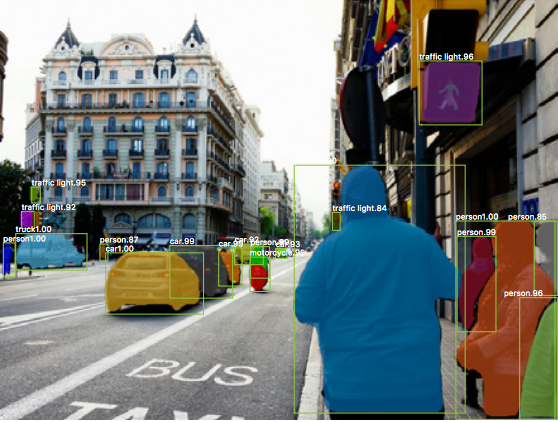

## 세그멘테이션의 발전

* R-CNN: https://arxiv.org/abs/1311.2524
  - 객체 탐지에 사용된 초기 모델
  - 주요 객체들을 바운딩 박스로 표현하여 정확히 식별하는게 목표
  - Selective Search를 통해 다양한 크기의 박스를 만들고, region proposal 영역 생성
  - region proposal 영역을 warp하여 표준화된 크기로 변환
  - AlexNet을 개량한 CNN 모델을 이용하고, 마지막 층에 SVM을 통해 객체 분류


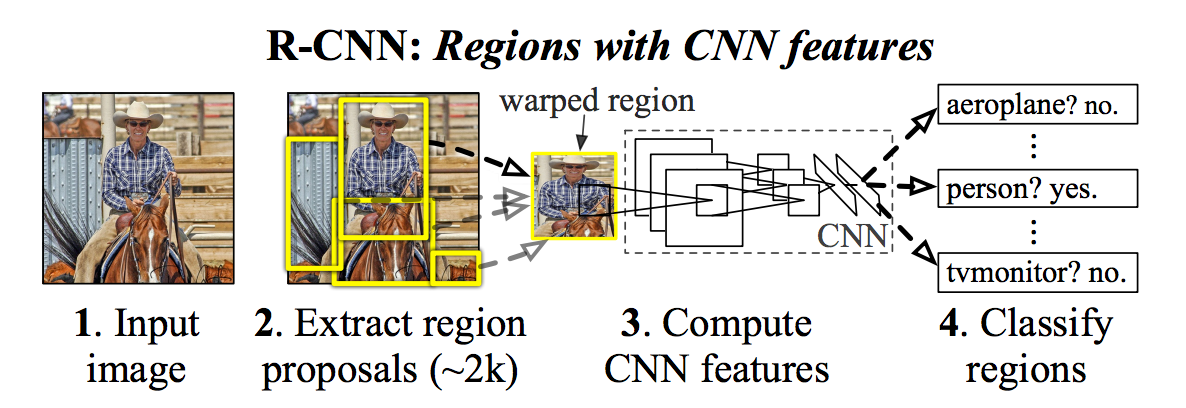

* Fast R-CNN: https://arxiv.org/abs/1504.08083
  - R-CNN의 단점인 느린 속도를 빠른 속도로 개선
  - ROI(Region of Interest) 풀링을 통해 한 이미지의 subregion에 대한 forward pass 값을 공유
  - R-CNN은 CNN 모델로 image feature를 추출, SVM 모델로 분류, Regressor 모델로 bounding box를 맞추는 작업으로 분류되어 있지만, Fast R-CNN은 하나의 모델로 동작
  - Top layer에 softmax layer를 둬서 CNN 결과를 class로 출력
  - Box regression layer를 softmax layer에 평행하게 두어 bounding box 좌표를 출력

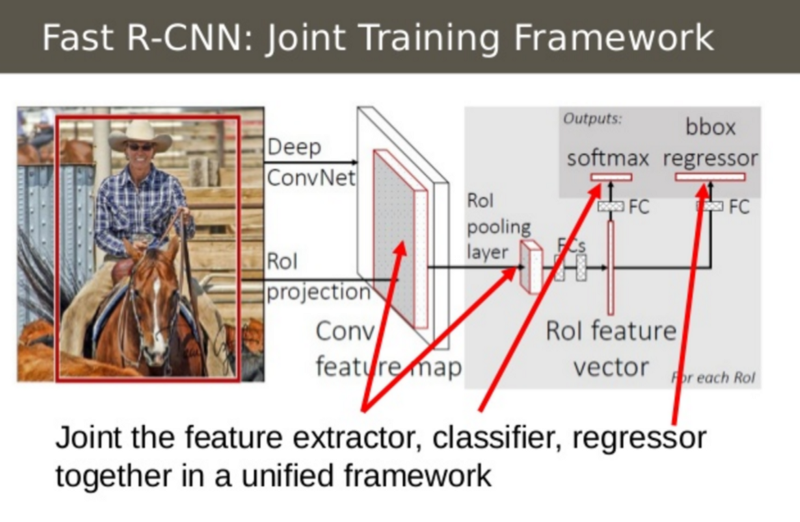

* Faster R-CNN: https://arxiv.org/abs/1506.01497
  - Fast R-CNN은 가능성 있는 다양한 bounding box들, 즉 ROI를 생성하는 과정인 selective search가 느려 region proposer에서 병목이 발생
  - 이미지 분류(classification)의 첫 단계인 CNN의 forward pass를 통해 얻어진 feature들을 기반으로 영역을 제안
  - CNN 결과를 selective search 알고리즘 대신 region proposal에 이용

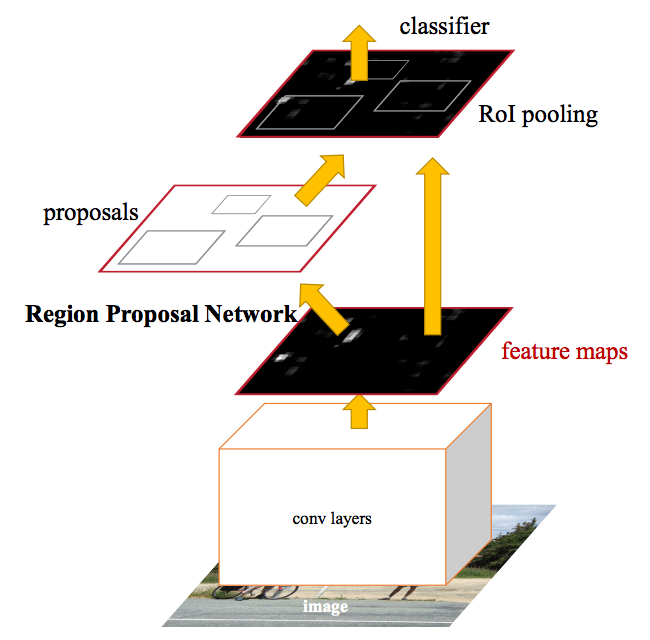

  - k개의 일반적인 비율을 지닌 anchor box를 이용하여 하나의 bounding box 및 score를 이미지의 위치별로 출력

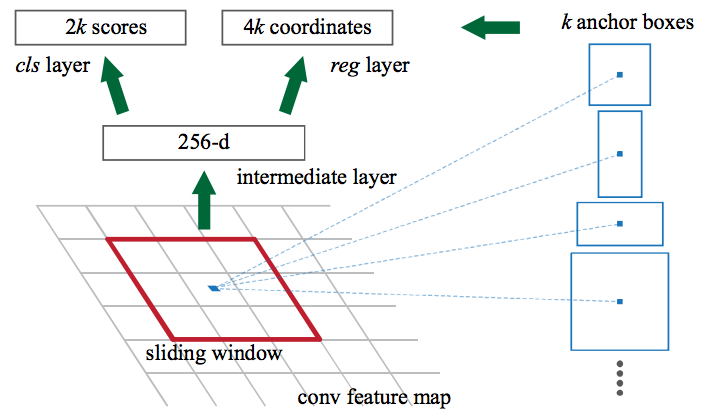

* Mask R-CNN: https://arxiv.org/abs/1703.06870
  - Pixel 레벨의 세그멘테이션
  - RolPool에서 선택된 feature map이 원래 이미지 영역으로 약간 잘못된 정렬이 발생한 부분을 RolAlign을 통해 조정하여 정확하게 정렬
  - Mask R-CNN은 Mask가 생성되면, Faster R-CNN으로 생성된 classification과 bounding box들을 합쳐 정확한 세그멘테이션 가능


# U-Net 기반 세그멘테이션

- 사용된 모델은 수정된 U-Net(https://arxiv.org/abs/1505.04597)
- U-Net이라 불리는 인코더(다운샘플링)와 디코더(업샘플링)를 포함한 구조는 정교한 픽셀 단위의 segmentation이 요구되는 biomedical image segmentation task의 핵심 요소
- Encoder-decoder 구조 또한 semantic segmentation을 위한 CNN 구조로 자주 활용
- Encoder 부분에서는 점진적으로 spatial dimension을 줄여가면서 고차원의 semantic 정보를 convolution filter가 추출해낼 수 있게 함
- Decoder 부분에서는 encoder에서 spatial dimension 축소로 인해 손실된 spatial 정보를 점진적으로 복원하여 보다 정교한 boundary segmentation을 완성
- U-Net은 기본적인 encoder-decoder 구조와 달리 Spatial 정보를 복원하는 과정에서 이전 encoder feature map 중 동일한 크기를 지닌 feature map을 가져 와 prior로 활용함으로써 더 정확한 boundary segmentation이 가능하게 함

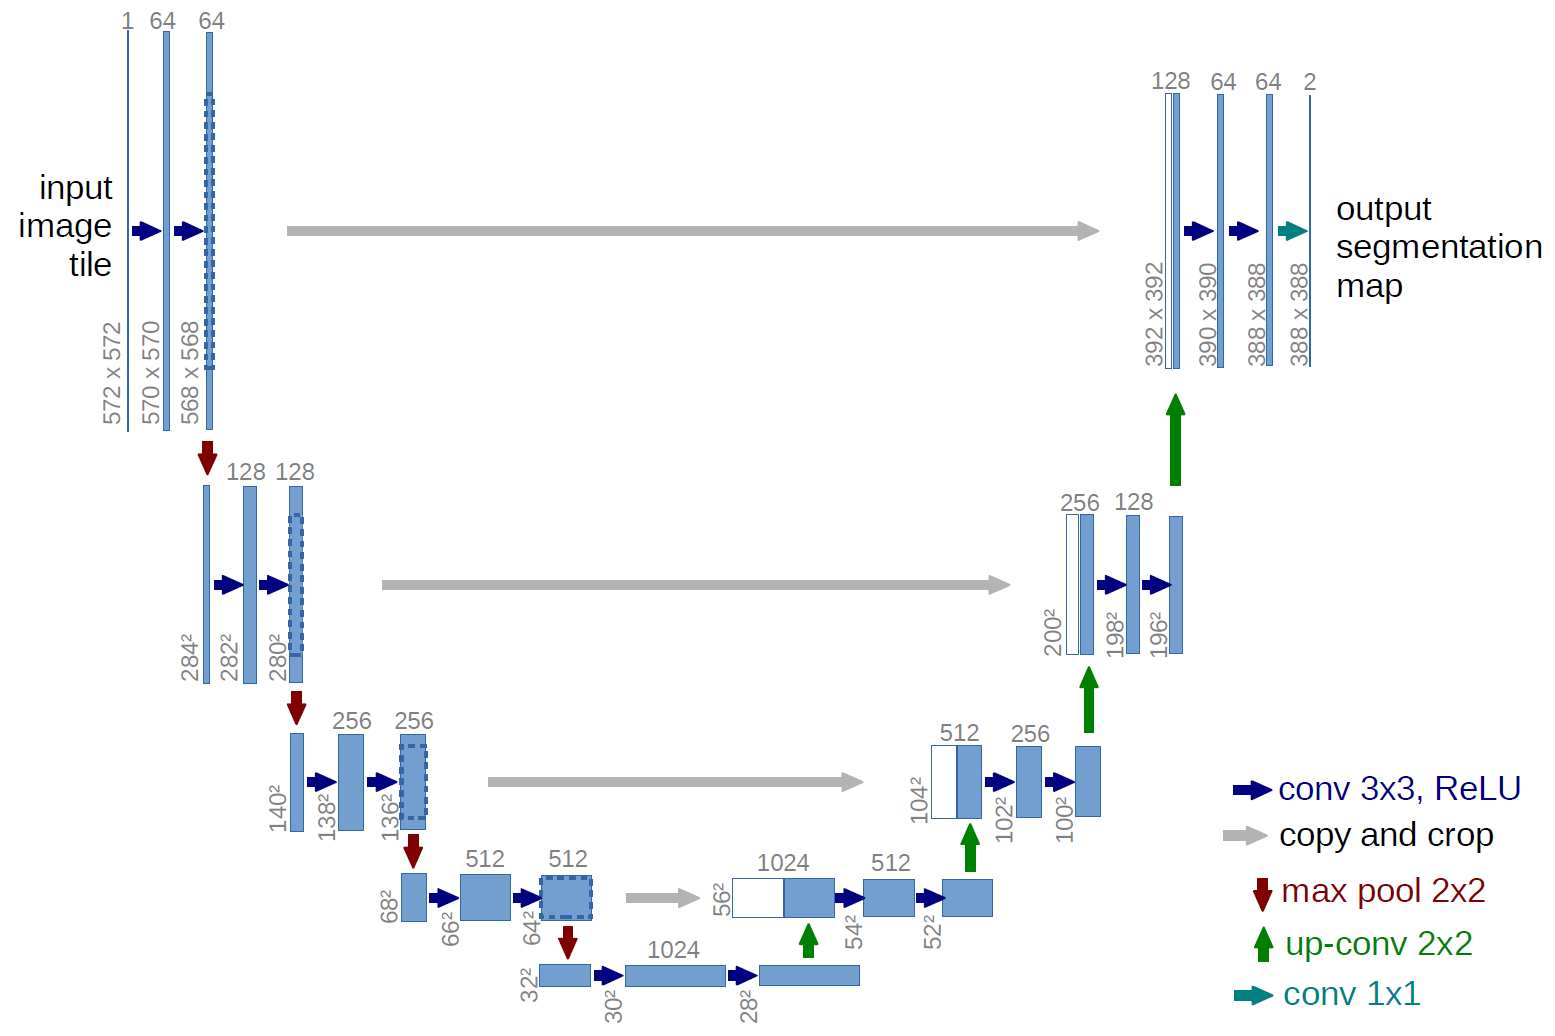

## Oxford-IIIT Pets 데이터셋

- Parkhi *et al*이 만든 [Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/) 데이터 세트는 영상, 해당 레이블과 픽셀 단위의 마스크로 구성
- 마스크는 기본적으로 각 픽셀의 레이블
- 각 픽셀은 다음 세 가지 범주 중 하나
  *   class 1 : 애완동물이 속한 픽셀
  *   class 2 : 애완동물과 인접한 픽셀
  *   class 3 : 위에 속하지 않는 경우/주변 픽셀

- Images: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
- Annotations: https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

In [86]:
#!curl -OL https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
#!curl -OL https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

!curl -L https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz -o image.tar.gz
!curl -L https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz -o annotations.tar.gz

!tar -zxvf images.tar.gz
!tar -zxvf annotations.tar.gz

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
annotations/trimaps/._pomeranian_180.png
annotations/trimaps/pomeranian_180.png
annotations/trimaps/._pomeranian_181.png
annotations/trimaps/pomeranian_181.png
annotations/trimaps/._pomeranian_182.png
annotations/trimaps/pomeranian_182.png
annotations/trimaps/._pomeranian_183.png
annotations/trimaps/pomeranian_183.png
annotations/trimaps/._pomeranian_184.png
annotations/trimaps/pomeranian_184.png
annotations/trimaps/._pomeranian_185.png
annotations/trimaps/pomeranian_185.png
annotations/trimaps/._pomeranian_186.png
annotations/trimaps/pomeranian_186.png
annotations/trimaps/._pomeranian_187.png
annotations/trimaps/pomeranian_187.png
annotations/trimaps/._pomeranian_188.png
annotations/trimaps/pomeranian_188.png
annotations/trimaps/._pomeranian_189.png
annotations/trimaps/pomeranian_189.png
annotations/trimaps/._pomeranian_19.png
annotations/trimaps/pomeranian_19.png
annotations/trimaps/._pomeranian_190.png
annotations/trimaps/pomeranian_190.png
annota

In [87]:
import os

input_dir = 'images'
target_dir = 'annotations/trimaps'
img_size = (160, 160)
num_classes = 3
batch_size = 32

input_img_paths = sorted([os.path.join(input_dir, fname) 
                           for fname in os.listdir(input_dir)
                           if fname.endswith('.jpg')])

target_img_paths = sorted([os.path.join(target_dir, fname) 
                          for fname in os.listdir(target_dir)
                          if fname.endswith('.png') and not fname.startswith('.') ])


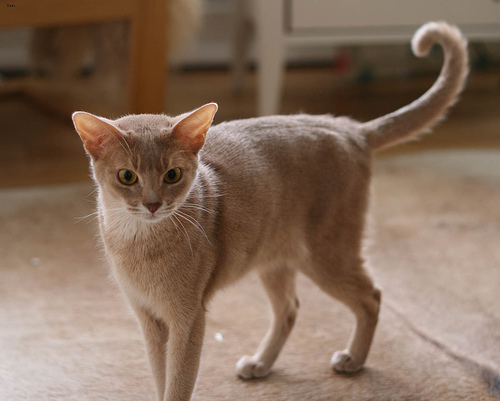

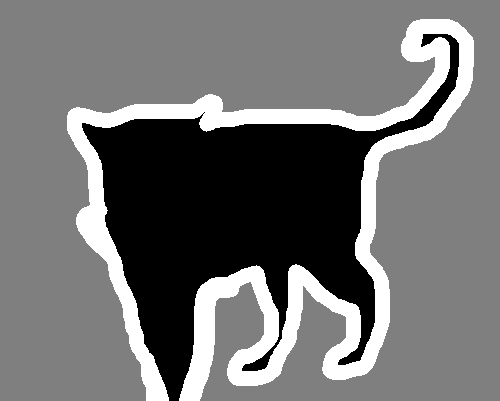

In [88]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps

display(Image(filename=input_img_paths[20]))
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[20]))
display(img)

## 데이터 전처리

In [89]:
import numpy as np
from tensorflow import keras

class OxfordPets(keras.utils.Sequence):
  def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
    self.batch_size = batch_size
    self.img_size = img_size
    self.input_img_paths = input_img_paths
    self.target_img_paths = target_img_paths

  def __len__(self):
    return len(self.target_img_paths) // self.batch_size
  
  def __getitem__(self, idx):
    i = idx * self.batch_size
    batch_input_img_paths = self.input_img_paths[i:i+self.batch_size]
    batch_target_img_paths = self.target_img_paths[i:i+self.batch_size]
    x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype='float32')
    for j, path in enumerate(batch_input_img_paths):
      img = load_img(path, target_size=self.img_size)
      x[j] = img
    y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype='uint8')
    for j, path in enumerate(batch_target_img_paths):
      img = load_img(path, target_size=self.img_size, color_mode='grayscale')
      y[j] = np.expand_dims(img, 2)
      y[j] -= 1

    return x, y

In [90]:
import random

val_samples = 1000
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)

train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]
val_input_img_paths = input_img_paths[:-val_samples:]
val_target_img_paths = target_img_paths[:-val_samples:]

train_gen = OxfordPets(batch_size, img_size, train_input_img_paths, train_target_img_paths)
val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)

## 모델 구성

In [91]:
from tensorflow.keras import layers

def get_model(img_sie, num_classes):
  inputs = keras.Input(shape=img_size + (3,))

  x = layers.Conv2D(32, 3, strides=2, padding='same')(inputs)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)

  previous_block_activation = x

  for filters in [64, 128, 256]:
    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    residual = layers.Conv2D(filters, 1, strides=2, padding='same')(previous_block_activation)
    x = layers.add([x, residual])
    previous_block_activation = x

  for filters in [256, 128, 64, 32]:
    x = layers.Activation('relu')(x)
    x = layers.Conv2DTranspose(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Activation('relu')(x)
    x = layers.Conv2DTranspose(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.UpSampling2D(2)(x)

    residual = layers.UpSampling2D(2)(previous_block_activation)
    residual = layers.Conv2D(filters, 1, padding='same')(residual)
    x = layers.add([x, residual])
    previous_block_activation = x

  outputs = layers.Conv2D(num_classes, 3, activation='softmax', padding='same')(x)

  model = keras.Model(inputs, outputs)
  return model

model = get_model(img_size, num_classes)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_42 (Conv2D)             (None, 80, 80, 32)   896         ['input_6[0][0]']                
                                                                                                  
 batch_normalization_71 (BatchN  (None, 80, 80, 32)  128         ['conv2d_42[0][0]']              
 ormalization)                                                                                    
                                                                                            

## 모델 학습

In [92]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

callbacks = [keras.callbacks.ModelCheckpoint('oxford_segmentation.h5', save_best_only=True)]

epochs = 20
model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=callbacks)

Epoch 1/20
199/199 [==============================] - 104s 462ms/step - loss: 0.9349 - val_loss: 1.3493
Epoch 2/20
199/199 [==============================] - 86s 435ms/step - loss: 0.4991 - val_loss: 2.7506
Epoch 3/20
199/199 [==============================] - 87s 439ms/step - loss: 0.4263 - val_loss: 0.4391
Epoch 4/20
199/199 [==============================] - 87s 436ms/step - loss: 0.3878 - val_loss: 0.3567
Epoch 5/20
199/199 [==============================] - 85s 427ms/step - loss: 0.3552 - val_loss: 0.3461
Epoch 6/20
199/199 [==============================] - 87s 439ms/step - loss: 0.3284 - val_loss: 0.3474
Epoch 7/20
199/199 [==============================] - 88s 440ms/step - loss: 0.3049 - val_loss: 0.2865
Epoch 8/20
199/199 [==============================] - 85s 429ms/step - loss: 0.2824 - val_loss: 0.2798
Epoch 9/20
199/199 [==============================] - 85s 425ms/step - loss: 0.2672 - val_loss: 0.2707
Epoch 10/20
199/199 [==============================] - 87s 435ms/step - 

## 추론

199/199 [==============================] - 41s 204ms/step


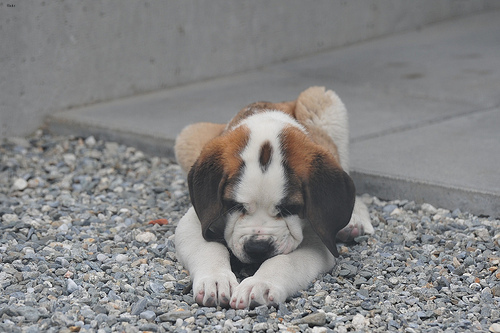

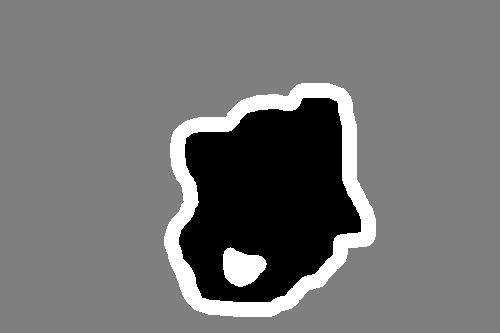

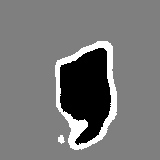

In [93]:
val_preds = model.predict(val_gen)

def display_mask(i):
  mask = np.argmax(val_preds[i], axis=-1)
  mask = np.expand_dims(mask, axis=-1)
  img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
  display(img)

i = 5

display(Image(filename=val_input_img_paths[i]))
img = PIL.ImageOps.autocontrast(load_img(val_target_img_paths[i]))
display(img)
display_mask(i)

# DeepLab 기반 세그멘테이션

* DeepLab V1: [Semantic Image Segmentation with Deep Convolutional Nets and Fully Connected CRFs](https://arxiv.org/abs/1412.7062), ICLR 2015.
  - Atrous convolution은 기존 convolution과 다르게 필터 내부에 빈 공간을 둔 채로 작동
  - 기존 convolution과 동일한 양의 파라미터와 계산량을 유지하면서 field of view (한 픽셀이 볼 수 있는 영역)를 크게 가져갈 수 있음
  - Semantic segmentation에서 일반적으로 높은 성능을 내기 위해서는 convolutional neural network의 마지막에 존재하는 한 픽셀이 입력값에서 어느 크기의 영역을 커버할 수 있는지를 결정하는 receptive field 크기가 중요
  - Atrous convolution을 활용하면 파라미터 수를 늘리지 않으면서도 receptive field를 크게 키울 수 있기 때문에 DeepLab 계열에서는 이를 적극적으로 활용

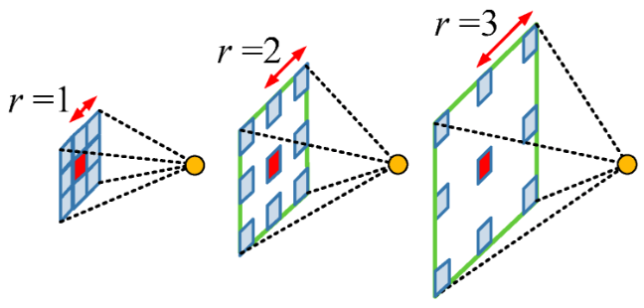

* DeepLab V2: [DeepLab: Semantic Image Segmentation with Deep Convolutional Nets, Atrous Convolution, and Fully Connected CRFs](https://arxiv.org/abs/1606.00915), TPAMI 2017.
  - Semantic segmentaion의 성능을 높이기 위한 방법 중 하나로, spatial pyramid pooling 기법을 자주 사용
  - Feature map으로부터 여러 개의 rate가 다른 atrous convolution을 병렬로 적용한 뒤, 이를 다시 합쳐주는 atrous spatial pyramid pooling (ASPP) 기법을 활용
  - multi-scale context를 모델 구조로 구현하여 보다 정확한 semantic segmentation을 수행할 수 있도록 함

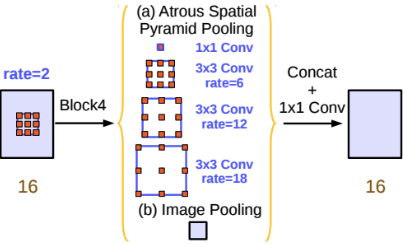

* DeepLab V3: [Rethinking Atrous Convolution for Semantic Image Segmentation](https://arxiv.org/abs/1706.05587), arXiv 2017.

  - Encoder: ResNet with Atrous convolution
  - Atrous Spatial Pyramid Pooling (ASPP)
  - Decoder: Bilinear Upsampling


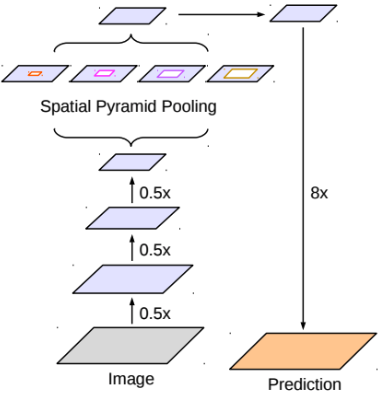

* DeepLab V3+: [Encoder-Decoder with Atrous Separable Convolution for Semantic Image Segmentation](https://arxiv.org/pdf/1802.02611.pdf), arXiv 2018.

  - Encoder: ResNet with Atrous Convolution → Xception (Inception with Separable Convolution)
  - ASPP → ASSPP (Atrous Separable Spatial Pyramid Pooling)
  - Decoder: Bilinear Upsampling → Simplified U-Net style decoder

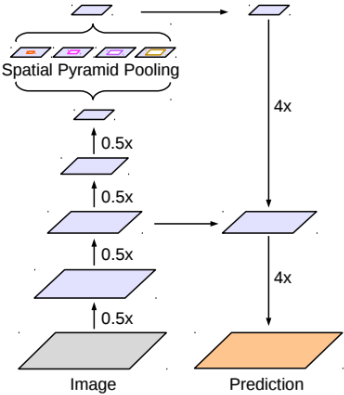

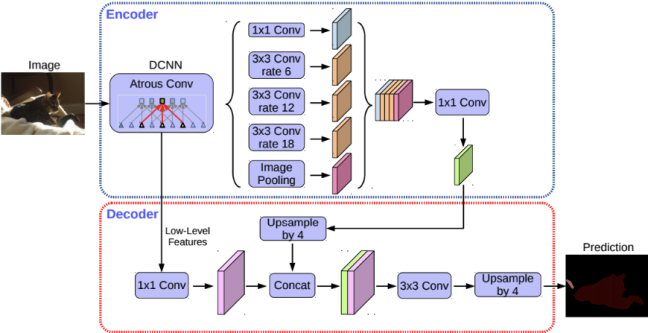

## 데이터셋 다운로드

* Crowd Instance-level Human Parsing (CIHP)(https://arxiv.org/abs/1811.12596)
* 38,280개의 다양한 인간 이미지
* instance-level-human-parsing.zip(2.7G): https://drive.google.com/uc?id=1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz

In [94]:
import os
import cv2
import numpy as np
from glob import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [85]:
!gdown https://drive.google.com/drive/folders/1YBZl20ElQgTv9CCrrQ9ph8TiUycQInIr
!un -q instance-level-human-parsing
!un -q ICCV15_fashion_dataset(ATR)

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/folders/1YBZl20ElQgTv9CCrrQ9ph8TiUycQInIr
To: /content/1YBZl20ElQgTv9CCrrQ9ph8TiUycQInIr
1.05MB [00:00, 51.4MB/s]
/bin/bash: un: command not found
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `un -q ICCV15_fashion_dataset(ATR)'


## 모델 구성

* 인코더-디코더 구조를 확장
* 인코더 모듈: 확장된 컨볼루션을 여러 척도로 적용하여 다중 스케일 상황 정보 처리
* 디코더 모듈: 객체 경계를 따라 분할 결과 조정


* 확장된 컨볼루션(Dilated convolution)
  - 컨볼루션 확장을 통해 네트워크 깊숙히 들어가며 스트라이드를 일정하게 유지 가능
  - 매개변수의 수나 계산량을 늘리지 않고도 더 큰 시야를 가질 수 있음
  - 더 큰 특징 맵 출력이 가능하여 세그멘테이션에 유용함

* 확장된 공간 피라미드 풀링(Dilated Spatial Pyramid Pooling)
  - 샘플링 속도가 커질수록 유효한 필터 가중치(유효한 특징 영역에 적용되는 가중치)의 수가 작아짐


![](https://github.com/lattice-ai/DeepLabV3-Plus/raw/master/assets/deeplabv3_plus_diagram.png)




* 사전 훈련된 ResNet50을 백본 모델로 사용
* `conv4_block6_2_relu` 블록에서 저수준의 특징 사용

* 인코더 특징은 인자 4에 의해 쌍선형 업샘플링
* 동일한 공간 해상도를 가진 네트워크 백본에서 저수준 특징과 연결

## 모델 학습

## 추론

* 데이터셋과 함께 제공된 `./instance-level_human_parsing/instance-level_human_parsing/human_colormap.mat` 파일을 통해 각 라벨에 대한 해당 색상을 찾을 수 있음


# Detectron Mask R-CNN

* 페이스북 인공지능 연구소(FAIR)에서 공개한 플랫폼
* 빠르고 유연한 사물 탐지 가능

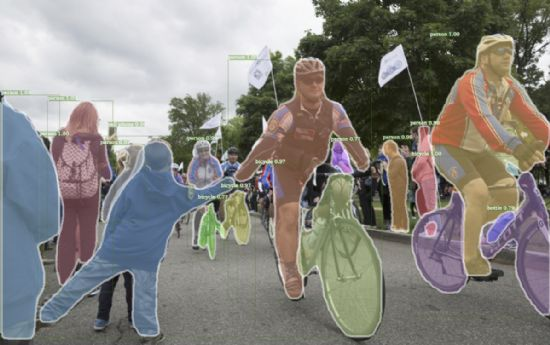

## Detectron 모델 설치

* Detectron Github: https://github.com/facebookresearch/Detectron.git

## 추론

* traffic_camera.jpg: https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/traffic_camera.jpg

* Config 파일: e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml
* 사전 모델: https://dl.fbaipublicfiles.com/detectron/36494496/12_2017_baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml.07_50_11.fkwVtEvg/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl

# Detectron2

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

* 페이스북 인공지능 연구소(FAIR)에서 개발한 객체 세그멘테이션 프레임워크
* 페이스북에서 개발한 DensePose, Mask R-CNN 등을 Detectron2에서 제공
* 손쉽게 다양한 사물들을 탐지하고 세그먼테이션하여, 객체의 유형, 크기, 위치 등을 자동으로 얻을 수 있음



## Detectron2 설치

* Tutorial: https://detectron2.readthedocs.io/tutorials/install.html
* Detectron2: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html

## 사전 모델

* input.jpg: http://images.cocodataset.org/val2017/000000439715.jpg

* Config 파일: COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml

## 커스텀 데이터셋 학습

### 데이터셋 준비

* Balloon 데이터셋: https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip

### 학습

* Config 파일: COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml


### 추론 및 평가



### 다른 타입 적용

* Config 파일: COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml

* Config 파일: COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml

### 비디오 파일 적용

* https://www.youtube.com/watch?v=ll8TgCZ0plk

* detectron2 github: https://github.com/facebookresearch/detectron2
* detectron2 config file: detectron2/configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml
* model weights: detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl